### Introduction

Data visualization is a key part of any analysis or data science workflow. However, it is frequently treated as an afterthought, the inconvenient and tedious part of reporting that you only do because you have to. Treating visualization as a second-class citizen is a mistake though. As the cliché goes, a picture is worth a thousand words. Data visualization should really be part of your workflow from the very beginning because there is a lot of value and insight to be gained from just looking at your data. Summary statistics are often not the whole story; [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is an unforgettable demonstration of this principle. Furthermore, the impact of an effective visualization is difficult to match with words and will go a long way towards ensuring that your work gets the recognition that it deserves. 

#### General pointers for data vizualization
In data visualization, there are three main types of variables:
1. Quantitative - These are numerical data and represent a measurement. Quantitative variables can be discrete (e.g. units sold in 2016) or continuous (e.g. average units sold per person). 
2. Categorical - The values of these variables are names or labels. There is no inherent ordering to the labels. Examples of such variables are countries in a sales database and the names of products. 
3. Ordinal - Variables which can take on values that are ranked on an arbitrary numerical scale. The numerical index associated with each value has no meaning except to rank the values relative to each other. Examples include days of the week, levels of satisfaction (not satisfied, satisfied, very satisfied), and customer value (low, medium, high). 

When visualizing data, the most important factor to keep in mind is the purpose of the visualization. This is what will guide you in choosing the best plot type. It could be that you are trying to compare two quantitative variables to each other. Maybe you want to check for differences between groups. Perhaps you are interested in the way a variable is distributed. Each of these goals is best served by different plots and using the wrong one can distort your interpretation of the data or the message that you are trying to convey. To that end, I have grouped the different plots we will cover by the situation that they are best suited for.

Another critical guiding principle is that simpler is almost always better. Often the most effective visualizations are those that are easily digested because the clarity of your thought processes is reflected in the clarity of your work. Additionally, overly complicated visuals can be misleading and hard to interpret which leads your audience (this can include yourself in many circumstances) to tune out. For these reasons keep your plots to two dimensions (unless the need for a third one is absolutely necessary), avoid visual noise (such as unnecessary tick marks, irrelevant annotations and clashing colors), and make sure that everything is legible.

#### Matplotlib
Matplotlib is the leading visualization library in Python. It is powerful, flexible, and has a dizzying array of chart types for you to choose from. For new users, matplotlib often feels overwhelming. You could spend a long time tinkering with all of the options available even if all you want to do is create a simple scatter plot. 

This tutorials is intended to help you get up-and-running with matplotlib quickly. We will go over how to create the most commonly used plots, when you would want to use each one, and highlight the parameters that you are most likely to adjust. There are actually has two main methods of interacting with matplotlib: the simpler pylab interface and the more complex pyplot one. We will be focusing on pyplot even though it has the steeper learning curve because it is the better way of accessing the full power of matplotlib.

### Dataset
For all examples shown, we will be using the daily version of the [Capital Bikeshare System dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental check outs in Washington DC's bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday). 

The object containing the dataset is called `daily_data`. This dataset contains a mix of categorical, quantitative, and ordinal variables. For this tutorial, only a subset of the available fields will be used, described and previewed below:
1. `dteday`: Date of the record (YYYY-MM-DD format)
2. `weekday`: Day of the week (0=Sunday, 6=Saturday)
3. `temp`: Normalized temperatre in Celcius
4. `windspeed`: Normalized wind speed
5. `casual`: Count of check outs by casual/non-registered users
6. `registered`: Count of check outs by registered users
7. `cnt`: Total check outs

In [4]:
# Download data, unzip, etc.
import pandas as pd
import urllib
import tempfile
import shutil
import zipfile

temp_dir = tempfile.mkdtemp()
data_source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
zipname = temp_dir + '/Bike-Sharing-Dataset.zip'
urllib.urlretrieve(data_source, zipname)

zip_ref = zipfile.ZipFile(zipname, 'r')
zip_ref.extractall(temp_dir)
zip_ref.close()

daily_path = temp_dir + '/day.csv'
daily_data = pd.read_csv(daily_path)
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum']
daily_data.drop(drop_list, inplace = True, axis = 1)

shutil.rmtree(temp_dir)

In [5]:
daily_data.head()

,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600


### Import matplotlib (and other useful libraries)
At this step, we will also specify some parameters for the plots that we will create. This saves us from having to type a lot of duplicate code and gives cohesion to all of our work. These parameters can be overidden during the creation of each plot if desired.

```
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
```

In [6]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

### Exploring relationships between quantitative variables
A common step in data analysis projects is to visually inspect and compare different quantative variables in your dataset. This can quickly reveal relationships between your variables. For example, you may find that two independent variables are correlated and that you will need to account for that in downstream analysis steps. Alternatively your analysis might show a spurious relationship between variables that is only revealed through visual inspection. 

#### Scatter plot
The first plot to consider in these situations is the scatter plot. In many cases this is the least aggregated representation of your data. Below we will plot the daily count of bikes that were checked out against the temperature.

```
# Define a function to create the scatterplot. This makes it easy to reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the data, set the size (s), color and transparency (alpha) of the points    
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
# Call the function to create plot
scatterplot(x_data = daily_data['temp']
            , y_data = daily_data['cnt']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')
            ```

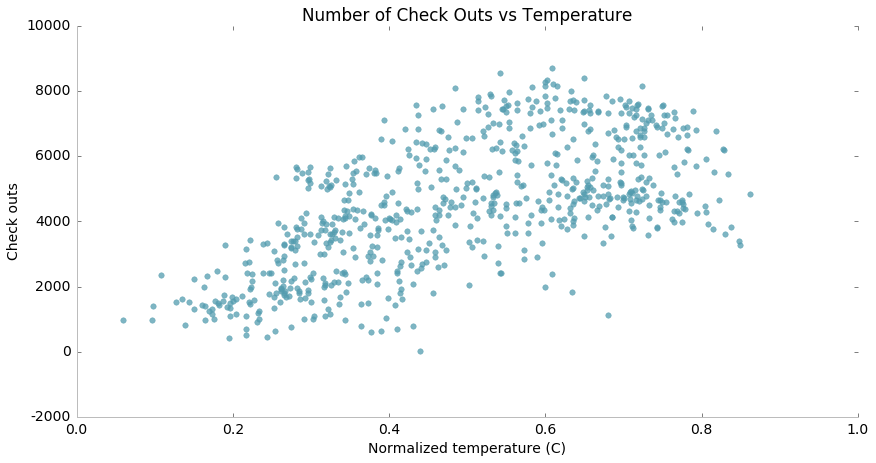

In [7]:
# Define a function to create the scatterplot. This makes it easy to reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the data, set the size (s), color and transparency (alpha) of the points    
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
# Call the function to create plot
scatterplot(x_data = daily_data['temp']
            , y_data = daily_data['cnt']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

#### Line plot

It looks like there is a pretty strong positive correlation between temperature and the number of bikes checked out. Let's fit a linear model to this. We'll then use a line plot to more clearly see this relationship and how well it fits the data.

```
# Perform linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(daily_data['temp'])
y = daily_data['cnt']
regr = sm.OLS(y, x)
res = regr.fit()
# Get fitted values from model to plot
st, data, ss2 = summary_table(res, alpha=0.05)
fitted_values = data[:,2]

# Define a function for the line plot
def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the best fit line, set the linewidth (lw), color and transparency (alpha) of the line    
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
# Call the function to create plot
lineplot(x_data = daily_data['temp']
         , y_data = fitted_values
         , x_label = 'Normalized temperature (C)'
         , y_label = 'Check outs'
         , title = 'Line of Best Fit for Number of Check Outs vs Temperature')
         ```

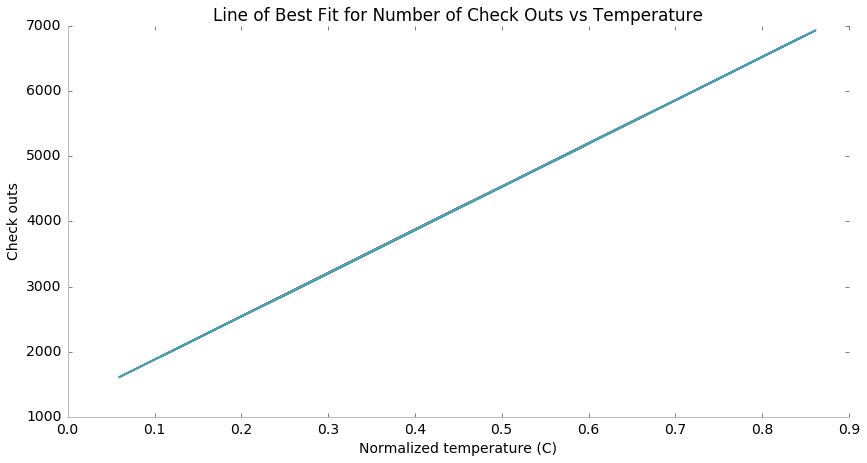

In [5]:
# Perform linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(daily_data['temp'])
y = daily_data['cnt']
regr = sm.OLS(y, x)
res = regr.fit()
# Get fitted values from model to plot
st, data, ss2 = summary_table(res, alpha=0.05)
fitted_values = data[:,2]

# Define a function for the line plot
def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the best fit line, set the linewidth (lw), color and transparency (alpha) of the line    
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
# Call the function to create plot
lineplot(x_data = daily_data['temp']
         , y_data = fitted_values
         , x_label = 'Normalized temperature (C)'
         , y_label = 'Check outs'
         , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

#### Line plot with confidence intervals
We can take this analysis one step further and also visualize the 95% confidence intervals about our model. This will help communicate how well our model fits the data.

```
# Get the confidence intervals of the model
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# Data for regions where we want to shade to indicate the intervals has to be sorted by the x axis to display correctly
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = daily_data['temp']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True)

# Define a function for the line plot with intervals
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the data, set the linewidth, color and transparency of the line, provide a label for the legend    
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Display legend
    ax.legend(loc = 'best')
    
# Call the function to create plot
lineplotCI(x_data = daily_data['temp']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Normalized temperature (C)'
           , y_label = 'Check outs'
           , title = 'Line of Best Fit for Number of Check Outs vs Temperature')
           ```

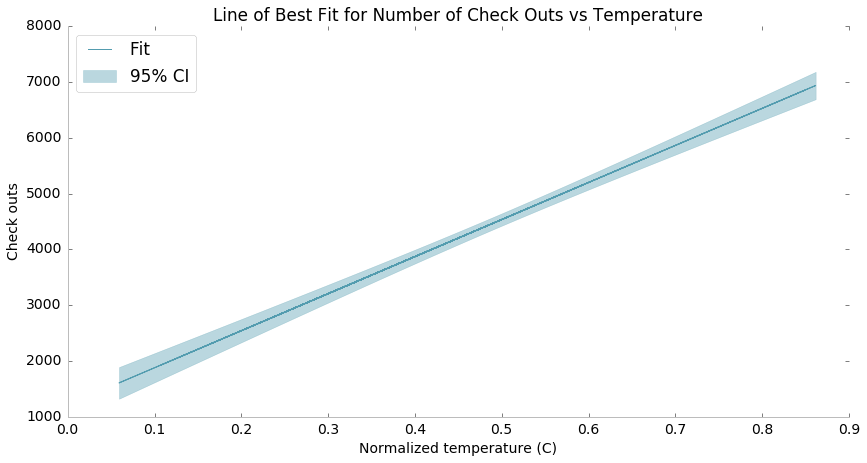

In [6]:
# Get the confidence intervals of the model
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# Data for regions where we want to shade to indicate the intervals has to be sorted by the x axis to display correctly
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = daily_data['temp']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True)

# Define a function for the line plot with intervals
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    # Plot the data, set the linewidth, color and transparency of the line, provide a label for the legend    
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Display legend
    ax.legend(loc = 'best')
    
# Call the function to create plot
lineplotCI(x_data = daily_data['temp']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Normalized temperature (C)'
           , y_label = 'Check outs'
           , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

#### Line plot with two y axes
This is what you should use when you want to compare two quantitative variables against each other over a third variable (time for example) but they have very different scales. From our plot of the confidence intervals, it looks like our simple model could be improved by adding in other independent variables. Let's examine the relationship between windspeed and checkouts over the whole period for which we have data.

```
# Define a function for a plot with two y axes
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    # Each variable will actually have its own plot object but they will be displayed in just one plot
    # Create the first plot object and draw the line
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)
    
    # Create the second plot object, telling matplotlib that the two objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    # Show right frame line
    ax2.spines['right'].set_visible(True)
    
# Call the function to create plot
lineplot2y(x_data = daily_data['dteday']
           , x_label = 'Day'
           , y1_data = daily_data['cnt']
           , y1_color = '#539caf'
           , y1_label = 'Check outs'
           , y2_data = daily_data['windspeed']
           , y2_color = '#7663b0'
           , y2_label = 'Normalized windspeed'
           , title = 'Check Outs and Windspeed Over Time')
           ```

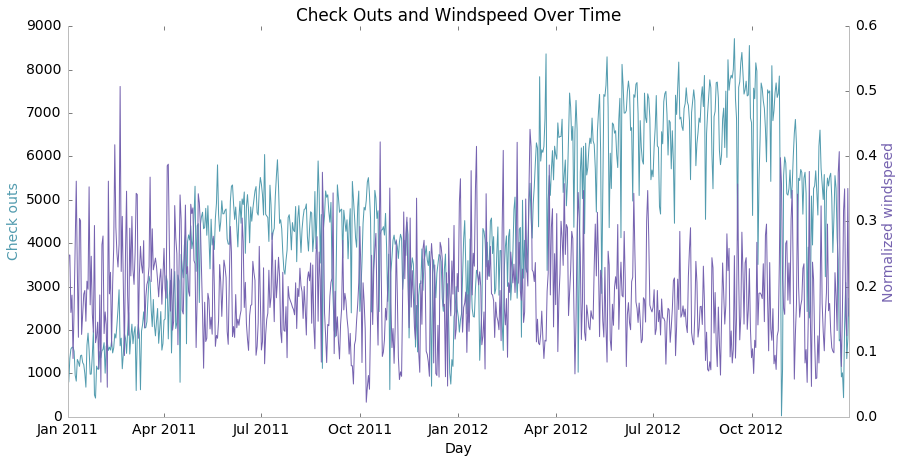

In [7]:
# Define a function for a plot with two y axes
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    # Each variable will actually have its own plot object but they will be displayed in just one plot
    # Create the first plot object and draw the line
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)
    
    # Create the second plot object, telling matplotlib that the two objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    # Show right frame line
    ax2.spines['right'].set_visible(True)
    
# Call the function to create plot
lineplot2y(x_data = daily_data['dteday']
           , x_label = 'Day'
           , y1_data = daily_data['cnt']
           , y1_color = '#539caf'
           , y1_label = 'Check outs'
           , y2_data = daily_data['windspeed']
           , y2_color = '#7663b0'
           , y2_label = 'Normalized windspeed'
           , title = 'Check Outs and Windspeed Over Time')

### Examining distributions
We will now switch gears and look at the family of plots for visualizing distributions. These plots can provide instant insights and guide further analysis. Is it uniform (equal frequency over all observed values)? Are there peaks at particular values? If so, which ones? You might find that a variable is extremely skewed and will need to be transformed.

#### Histogram
Histograms are used to get a rough idea of how a quantitative variable is distributed. The observed values are placed into different bins and the frequency of observations in each of those bins is calculated. For this example, let's examine the distribution of registered bike check outs.

```
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
histogram(data = daily_data['registered']
           , x_label = 'Check outs'
           , y_label = 'Frequency'
           , title = 'Distribution of Registered Check Outs')
           ```

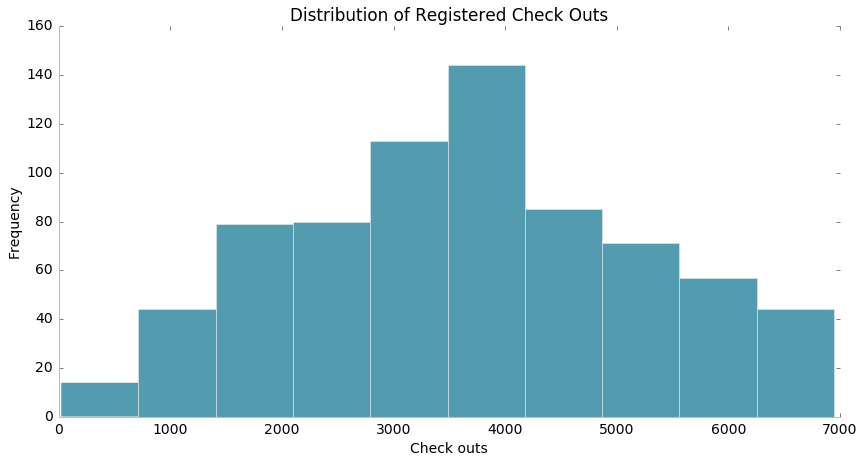

In [8]:
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
histogram(data = daily_data['registered']
           , x_label = 'Check outs'
           , y_label = 'Frequency'
           , title = 'Distribution of Registered Check Outs')

#### Overlaid histogram
If you are looking to compare two (or more) distributions, use an overlaid histogram. Some additional care needs to be taken with these plots to ensure that they remain clear and easy to read, expecially when more than two distributions are visualized. In this example, we will compare the distributions of registered and casual check outs.

```
# Define a function for an overlaid histogram
def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    
    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
    
# Call the function to create plot
overlaid_histogram(data1 = daily_data['registered']
                   , data1_name = 'Registered'
                   , data1_color = '#539caf'
                   , data2 = daily_data['casual']
                   , data2_name = 'Casual'
                   , data2_color = '#7663b0'
                   , x_label = 'Check outs'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Check Outs By Type')
                   ```

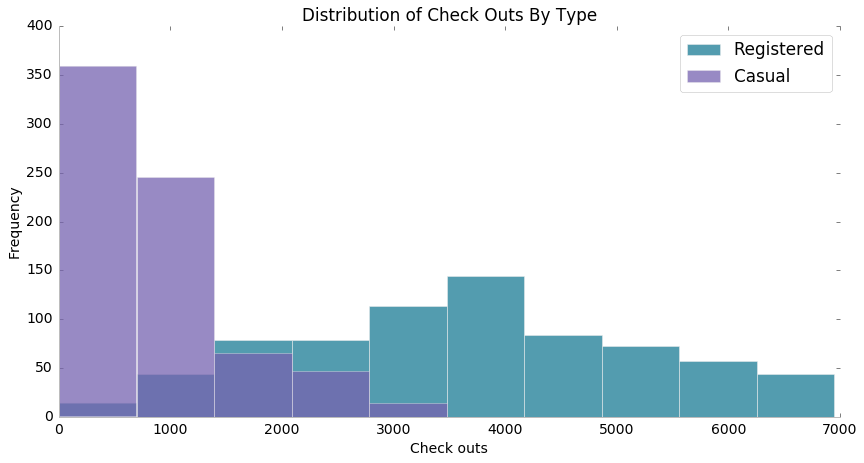

In [9]:
# Define a function for an overlaid histogram
def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    
    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
    
# Call the function to create plot
overlaid_histogram(data1 = daily_data['registered']
                   , data1_name = 'Registered'
                   , data1_color = '#539caf'
                   , data2 = daily_data['casual']
                   , data2_name = 'Casual'
                   , data2_color = '#7663b0'
                   , x_label = 'Check outs'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Check Outs By Type')

#### Density plot
Although histograms are intuitive and easily digested, the apparent shape of the distribution can be strongly affected by the number of bins chosen. A more rigorous method to determine the shape of a distrubtion is to use a density plot. This contructs an estimate of the underlying probability density function of the data. In the example below, we will use registered check outs.  

```
# We must first create a density estimate from our data
from scipy.stats import gaussian_kde
data = daily_data['registered']
density_est = gaussian_kde(data)
density_est.covariance_factor = lambda : .25 # This controls the 'smoothness' of the estimate. Higher values give smoother estimates.
density_est._compute_covariance()
x_data = np.arange(min(data), max(data), 200)

# Define a function for a density plot
def densityplot(x_data, density_est, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.plot(x_data, density_est(x_data), color = '#539caf', lw = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
densityplot(x_data = x_data
            , density_est = density_est
            , x_label = 'Check outs'
            , y_label = 'Frequency'
            , title = 'Distribution of Registered Check Outs')
            ```

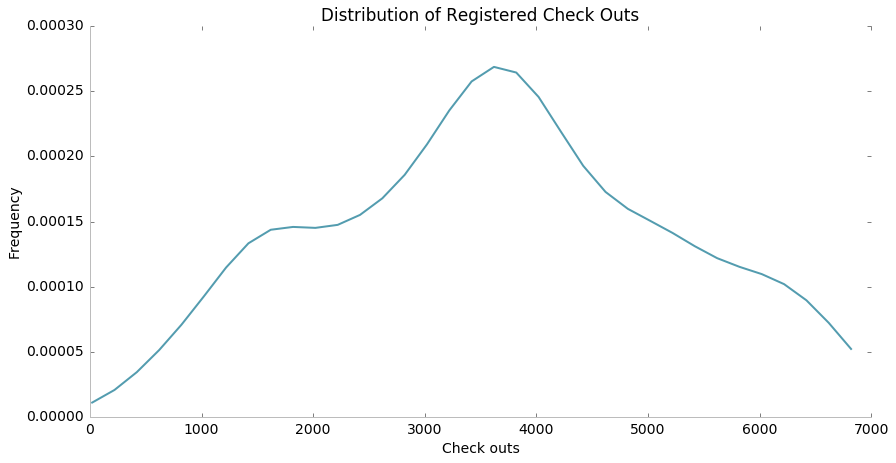

In [10]:
# We must first create a density estimate from our data
from scipy.stats import gaussian_kde
data = daily_data['registered']
density_est = gaussian_kde(data)
density_est.covariance_factor = lambda : .25 # This controls the 'smoothness' of the estimate. Higher values give smoother estimates.
density_est._compute_covariance()
x_data = np.arange(min(data), max(data), 200)

# Define a function for a density plot
def densityplot(x_data, density_est, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.plot(x_data, density_est(x_data), color = '#539caf', lw = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
densityplot(x_data = x_data
            , density_est = density_est
            , x_label = 'Check outs'
            , y_label = 'Frequency'
            , title = 'Distribution of Registered Check Outs')

### Between group comparisons

The final family of plots that we will cover have to do with comparing quantitative variables between different groups or categories. Arguably, this group of plots have the highest number of factors to take into consideration during creation. For example, is a stacked or grouped bar chart more approriate? If you decide on the grouped version, which level of grouping will you use? How many distinct groups should be displayed and which, if any, should be grouped together into an 'other' category? These are likely to be among the plots that you will use the most. As such it will really pay off to consider these details when making your design choices.

#### Bar plot
The simple bar plot is best used when there is just one level of grouping to your variable. Let's take a look at what the mean number of check outs is for each day of the week. We will also add error bars to indicate the standard deviation for each day.

```
# Calculate the mean and standard deviation for number of check outs each day
mean_total_co_day = daily_data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])
mean_total_co_day.columns = mean_total_co_day.columns.droplevel()

# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none' to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
barplot(x_data = mean_total_co_day.index.values
        , y_data = mean_total_co_day['mean']
        , error_data = mean_total_co_day['std']
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')
        ```

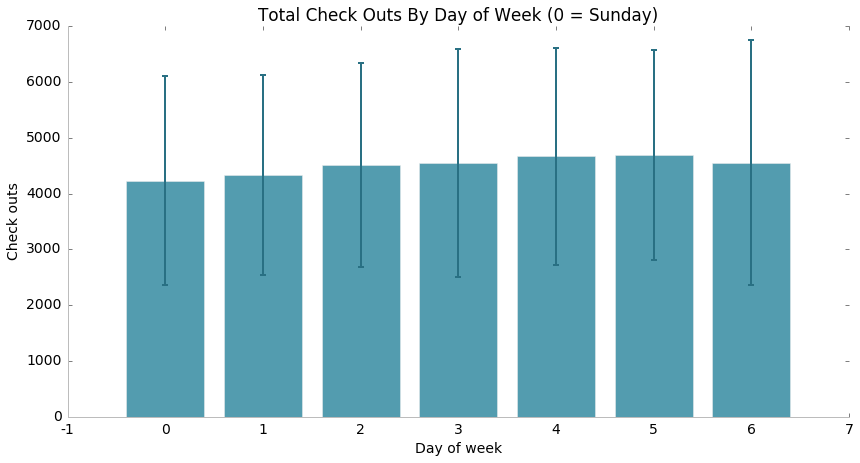

In [11]:
# Calculate the mean and standard deviation for number of check outs each day
mean_total_co_day = daily_data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])
mean_total_co_day.columns = mean_total_co_day.columns.droplevel()

# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none' to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# Call the function to create plot
barplot(x_data = mean_total_co_day.index.values
        , y_data = mean_total_co_day['mean']
        , error_data = mean_total_co_day['std']
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')

There are several options when there is more than one level to how we are grouping our data. To expand on the example above, we can divide check outs into those by registered and casual users. So we now have two grouping levels: day of week and registration status. 

#### Stacked bar plot
Stacked bar plots are best used to compare proportions between categories (proportion of registered vs casual check outs on Monday for instance). Using stacked bar plots with raw values often leads to decreased interpretability. 

```
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()

# Calculate the mean number of check outs for each day by registration status
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Proportion of check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')
               ```

In [12]:
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
mean_by_reg_co_day

,registered,casual
weekday,,
0,2890.533333,1338.295238
1,3663.990476,674.133333
2,3954.480769,556.182692
3,3997.394231,551.144231
4,4076.298077,590.961538
5,3938.000000,752.288462
6,3085.285714,1465.257143


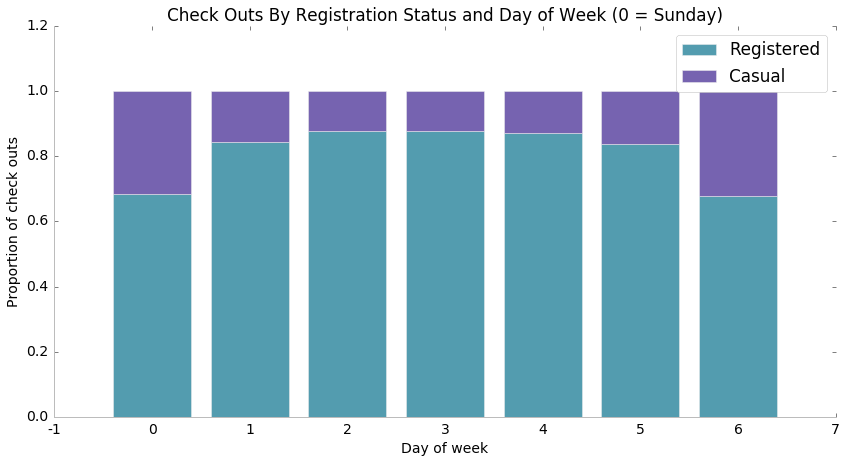

In [13]:
# Calculate the mean number of check outs for each day by registration status
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Proportion of check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')

#### Grouped bar plot
For situations where you need to compare the actual values between categories, grouped bar plots are a good option. In grouped bar plots, categories from one grouping (registration status) are clustered based another grouping (day of week). Ideally the number of categories in the first grouping should be no higher than three for legibility.

```
# Define a function for a grouped bar plot
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 0.8
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)   
    
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
# Call the function to create plot
groupedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['registered'], mean_by_reg_co_day['casual']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')
               ```

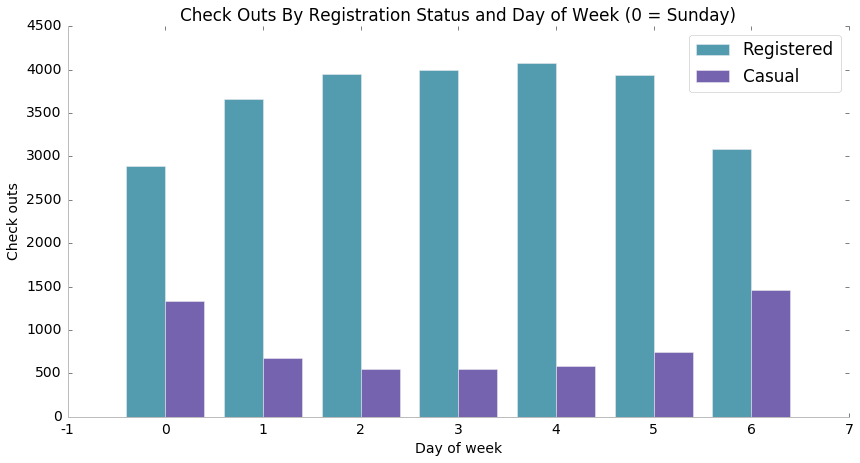

In [14]:
# Define a function for a grouped bar plot
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 0.8
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)   
    
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    
# Call the function to create plot
groupedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['registered'], mean_by_reg_co_day['casual']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)')

#### Box plot
Box plots are most suited to displaying the distribution of a variable across multiple groups. The bottom and top of the boxes indicate the lower and upper quartiles, respectively, and the line inside the box is for the median. Vertical lines extending from the boxes ('whiskers') show the range of the data (by default this is 1.5x past the upper and lower quartiles in matplotlib). Box plots can be thought of as a hybrid between bar plots and overlaid histograms. They surface much of the same information as bar plots but they also expose the variation in the data. However, they do not show the underlying distribution of the data.

We will use a box plot as an alternative representation of the data in the simple bar plot example (total check outs by day of week).

```
# Unlike with bar plots, there is no need to aggregate the data before plotting
# However the data for each group (day) needs to be defined
days = np.unique(daily_data['weekday'])
bp_data = []
for day in days:
    bp_data.append(daily_data[daily_data['weekday'] == day]['cnt'].values)
    
# Define a function to create a boxplot:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()
    
    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whiker caps
               , capprops = {'color': base_color})  
    
    # By default, the tick label starts at 1 and increments by 1 for each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
boxplot(x_data = days
        , y_data = bp_data
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')
        ```

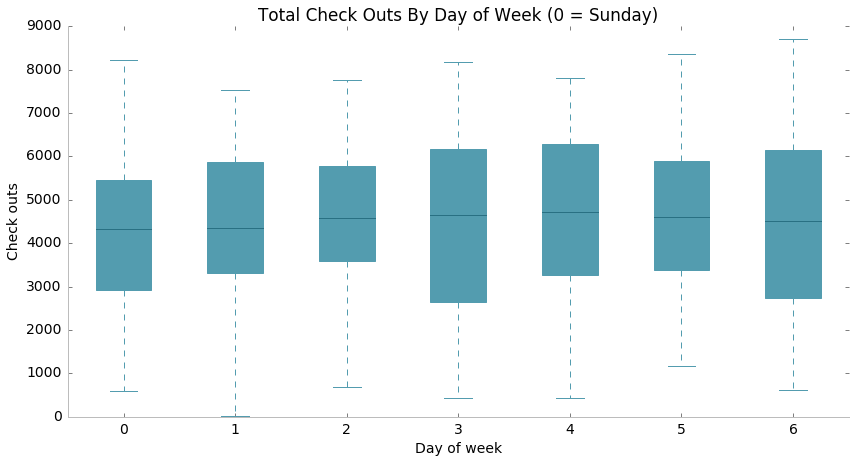

In [15]:
# Unlike with bar plots, there is no need to aggregate the data before plotting
# However the data for each group (day) needs to be defined
days = np.unique(daily_data['weekday'])
bp_data = []
for day in days:
    bp_data.append(daily_data[daily_data['weekday'] == day]['cnt'].values)
    
# Define a function to create a boxplot:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()
    
    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whiker caps
               , capprops = {'color': base_color})  
    
    # By default, the tick label starts at 1 and increments by 1 for each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
boxplot(x_data = days
        , y_data = bp_data
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')

### Conclusions
Data visualization should be part of every step of your analysis/data science workflow. There is a lot of value to be gained from simply looking at your data. Visualization should be regarded as a complement to summary statistics - doing just one without the other will leave you with an incomplete and potentially misleading view of your data. Just as choosing the right summary statistic for the situation at hand is critical, so is selecting the right plot type for your purposes, however basic or advanced. When comparing quantitative variables to each other, consider scatter and line plots. If you are interested in how a variable is distributed, turn to histograms and density plots. For comparisons involving categorical variables, bar and box plots are a good starting point.

### References
All plots: http://matplotlib.org/api/pyplot_api.html

Line plot with confidence intervals: http://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

Density plot: http://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib

http://milkbox.net/note/gaussian-kde-smoothed-histograms-with-matplotlib/

Stacked bar plot: http://chrisalbon.com/python/matplotlib_stacked_bar_plot.html

https://www.safaribooksonline.com/library/view/matplotlib-plotting-cookbook/9781849513265/ch01s10.html